# Basic Recommendation System

Using  Correlation

# 1)-Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
# for processing data
import pandas as pd
import numpy as np
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
# for model
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

# 2)- Loading data

https://grouplens.org/datasets/movielens/

In [5]:
#1st dataset
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data.txt', sep='\t', names=column_names)
#2nd dataset
movie_titles = pd.read_csv("Movie_Id_Titles.txt")

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
df.shape

(100003, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [9]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
movie_titles.shape

(1682, 2)

In [11]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
item_id    1682 non-null int64
title      1682 non-null object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


### merge datasets

In [12]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# 3)- Data exploring

In [13]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [14]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [15]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [16]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


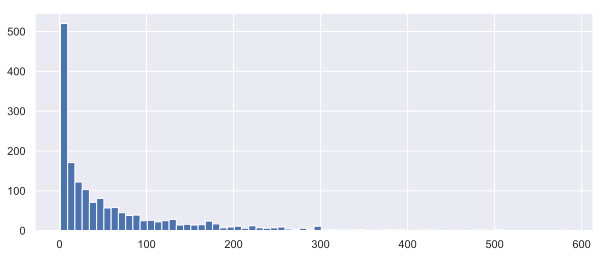

In [17]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

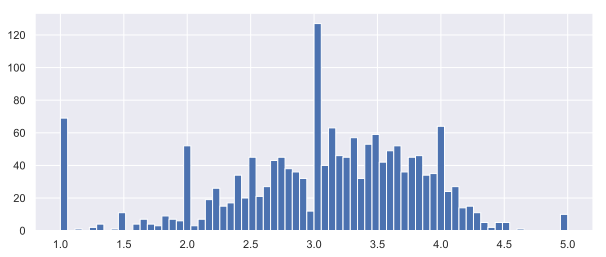

In [18]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

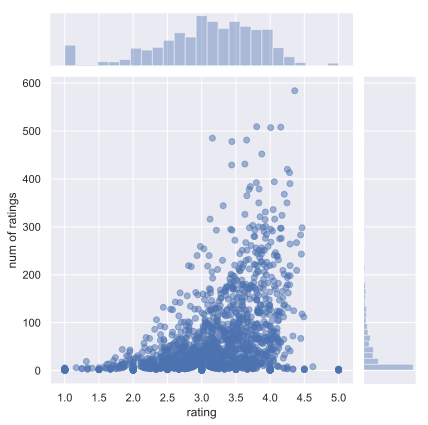

In [19]:
# check relation
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# 4)-Recommendation Model


In [20]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [22]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [23]:
scream_user_ratings = moviemat['Scream (1996)']
fargo_user_ratings = moviemat['Fargo (1996)']
scream_user_ratings.head()

user_id
0    NaN
1    NaN
2    3.0
3    2.0
4    4.0
Name: Scream (1996), dtype: float64

In [24]:
similar_to_scream = moviemat.corrwith(scream_user_ratings)
similar_to_fargo = moviemat.corrwith(fargo_user_ratings)

In [25]:
corr_scream = pd.DataFrame(similar_to_scream,columns=['Correlation'])
corr_scream.dropna(inplace=True)
corr_scream.head()

,Correlation
title,
'Til There Was You (1997),0.454859
1-900 (1994),-0.944911
101 Dalmatians (1996),0.124059
12 Angry Men (1957),-0.025659
187 (1997),0.382836


In [26]:
corr_scream.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Love and Death on Long Island (1997),1.0
Turbo: A Power Rangers Movie (1997),1.0
Scream (1996),1.0
Caro Diario (Dear Diary) (1994),1.0
Time Tracers (1995),1.0
8 Seconds (1994),1.0
Infinity (1996),1.0
Safe Passage (1994),1.0
"Scarlet Letter, The (1926)",1.0


**Checking co-relation of Scream movie with others**

In [27]:
corr_scream = corr_scream.join(ratings['num of ratings'])
corr_scream.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.454859,9
1-900 (1994),-0.944911,5
101 Dalmatians (1996),0.124059,109
12 Angry Men (1957),-0.025659,125
187 (1997),0.382836,41


In [28]:
corr_scream[corr_scream['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Scream (1996),1.000000,478
Scream 2 (1997),0.706028,106
Seven (Se7en) (1995),0.435188,236
Starship Troopers (1997),0.419322,211
"Nightmare on Elm Street, A (1984)",0.410796,111


**checking recommendation for liar liar**

In [29]:
corr_fargo = pd.DataFrame(similar_to_fargo,columns=['Correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo = corr_fargo.join(ratings['num of ratings'])
corr_fargo[corr_fargo['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
